In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('telecom_churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Задача создать модель, предсказывающую отток клиентов. Целевой признак - **Churn** (бинарный, 1- потеряем клиента, 0 - не потеряем). Задача бинарной классификации.

**Описание полей**</br>
Название - Описание - Тип </br>
- **State** - Буквенный код штата - номинальный</br>
- **Account length** - Как долго клиент обслуживается компанией - количественный</br>
- **Area code** - Префикс номера телефона - количественный</br>
- **International plan** - Международный роуминг (подключен/не подключен) - бинарный</br>
- **Voice mail plan** - Голосовая почта (подключена/не подключена) - бинарный</br>
- **Number vmail messages** - Количество голосовых сообщений - количественный</br>
- **Total day minutes** - Общая длительность разговоров днем - количественный</br>
- **Total day calls** - Общее количество звонков днем - количественный</br>
- **Total day charge** - Общая сумма оплаты за услуги днем - количественный</br>
- **Total eve minutes** - Общая длительность разговоров вечером - количественный</br>
- **Total eve calls** - Общее количество звонков вечером - количественный</br>
- **Total eve charge** - Общая сумма оплаты за услуги вечером - количественный</br>
- **Total night minutes** - Общая длительность разговоров ночью - количественный</br>
- **Total night calls** - Общее количество звонков ночью - количественный</br>
- **Total night charge** - Общая сумма оплаты за услуги ночью - количественный</br>
- **Total intl minutes** - Общая длительность международных разговоров - количественный</br>
- **Total intl calls** - Общее количество международных разговоров - количественный</br>
- **Total intl charge** - Общая сумма оплаты за международные разговоры - количественный</br>
- **Customer service calls** - Число обращений в сервисный центр - количественный

In [4]:
df.shape #количество строк и столбцов

(3333, 20)

## Scikit-learn

In [5]:
#меняем тип у не числовых переменноых
df['Churn']=df['Churn'].astype('int64')
d={'No':0, 'Yes':1}
df['International plan']=df['International plan'].map(d) #поменяли No на 0, Yes на 1 в столбце International plan
df['Voice mail plan']=df['Voice mail plan'].map(d) #поменяли No на 0, Yes на 1 в столбце Voice mail plan

In [6]:
df.describe(include='object') #смотрим описание столбца типа object

,State
count,3333
unique,51
top,WV
freq,106


Штатов много, но каждый из них объеме общих данных занимает меньше 3%, поэтому предположим что штат не влиет на лояльность к компании, поэтому удаляем столбец "штат" из датасета.

In [7]:
df = df.drop(['State'], axis=1)
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [8]:
df.isna().values.any() #есть пропущенные значения?

False

In [9]:
df['Churn'].value_counts() # смотрим распределение данных в столбце Churn. Набор данных несбалансированный

0    2850
1     483
Name: Churn, dtype: int64

In [11]:
data = df.sample(frac=0.95, random_state=786) #датасет без 5% данных, с которым будем дальше работать
data_unseen = df.drop(data.index) #удаляем из исходного датасета, данные, которые выделили выше. то что останется будем использовать для финальных прогнозов при проверке модели
data_unseen_=data_unseen.drop('Churn', axis=1) #датасет без столбца Churn для прогнозирования
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Данные для моделирования: ' + str(data.shape))
print('Новые данные для прогноза: ' + str(data_unseen.shape))

Данные для моделирования: (3166, 19)
Новые данные для прогноза: (167, 19)


In [12]:
from sklearn.model_selection import train_test_split
#делим датасет на два набора данных: один для обучения (80%) и один — для тестирования (20%) 
train_x, test_x, train_y, test_y=train_test_split(data.drop('Churn', axis=1),data['Churn'],test_size=0.2, random_state=18)

In [13]:
train_x.shape

(2532, 18)

In [14]:
test_x.shape

(634, 18)

In [15]:
train_y.shape

(2532,)

In [16]:
test_y.shape

(634,)

## Градиентный бустинг

### AdaBoostClassifier

In [17]:
from sklearn.ensemble import AdaBoostClassifier
skl_abc=AdaBoostClassifier(random_state=348) #модель
skl_abc.fit(train_x,train_y) #обучаем

AdaBoostClassifier(random_state=348)

In [18]:
skl_abc_predicted=skl_abc.predict(test_x) #тестируем модель
accuracy_abc_test=skl_abc.score(test_x,test_y) # смотрим среднее значение accuracy - аккуратность: процент (коэффициент) случаев, классифицированных правильно
accuracy_abc_test

0.8848580441640379

In [19]:
from sklearn.metrics import roc_auc_score
skl_abc_probabilities = skl_abc.predict_proba(test_x ) #создаем набор вероятностей прогнозирования на основе тестовых данных. результат функции таблица, где первый столбец - вероятность что Churn=0, второй, что Churn=1
roc_auc_abc_test=roc_auc_score(test_y, skl_abc_probabilities[:,1] ) #считаем оценки ROC AUC, первый параметр фактические значения Churn, второй - вероятность что Churn=1 
roc_auc_abc_test

0.8886730212697064

In [20]:
from sklearn.metrics import precision_score
precision_abc_test=precision_score(test_y, skl_abc_predicted)
precision_abc_test

0.6551724137931034

In [21]:
from sklearn.metrics import recall_score
recall_abc_test=recall_score(test_y, skl_abc_predicted)
recall_abc_test

0.4175824175824176

0.8886730212697064

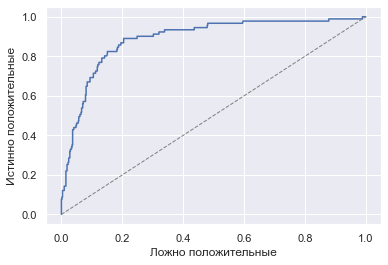

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import metrics
from sklearn.metrics import roc_curve

fpr,tpr,_=roc_curve(test_y, skl_abc_probabilities[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color='grey', lw=1,linestyle='--')
plt.xlabel('Ложно положительные')
plt.ylabel('Истинно положительные')
metrics.auc(fpr,tpr)

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(test_y, skl_abc_predicted) # матрица неточностей

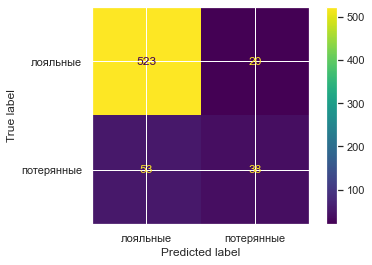

In [24]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['лояльные', 'потерянные'])
disp.plot()

523 - действующий клиент, предсказан правильно, т.е. что не потеряем (истинно положительное) </br>
20 - действующий клиент, предсказан неправильно, т.е. что потеряем (ложно отрицательное)</br>
53 - предсказан что не потеряем, но на самом деле потеряли (ложно положительное)</br>
38 - предсказан что потеряем и потеряли (истинно отрицательное)</br>
Судя по этой матрице, модель потерю клиента предсказывает хуже, чем то что он останется.

In [26]:
skl_abc_unseen=data_unseen.copy(deep=True)
skl_abc_result=skl_abc.predict(data_unseen_)
skl_abc_unseen.insert(loc=18,column='Predicted', value=skl_abc_result)
#skl_abc_unseen.sort_values(by='Churn',ascending=False).head(22)
res_abc=skl_abc_unseen.where(((skl_abc_unseen['Churn']==1)&(skl_abc_unseen['Predicted']==1))|((skl_abc_unseen['Churn']==0)&(skl_abc_unseen['Predicted']==0))) #датасет с данными где предсказали прекращение контракта и это на самом деле случилось
res_abc=res_abc.dropna() 
res_abc.head(167) 

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Predicted,Churn
1,95.0,510.0,0.0,0.0,0.0,156.6,88.0,26.62,247.6,75.0,21.05,192.3,115.0,8.65,12.3,5.0,3.32,3.0,0.0,0.0
2,93.0,510.0,0.0,0.0,0.0,190.7,114.0,32.42,218.2,111.0,18.55,129.6,121.0,5.83,8.1,3.0,2.19,3.0,0.0,0.0
4,70.0,415.0,0.0,1.0,24.0,249.5,101.0,42.42,259.7,98.0,22.07,222.7,68.0,10.02,9.8,4.0,2.65,1.0,0.0,0.0
6,99.0,415.0,0.0,0.0,0.0,198.2,87.0,33.69,207.3,76.0,17.62,190.9,113.0,8.59,8.7,3.0,2.35,4.0,0.0,0.0
7,95.0,408.0,0.0,0.0,0.0,135.0,99.0,22.95,183.6,106.0,15.61,245.3,102.0,11.04,12.5,9.0,3.38,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,88.0,408.0,0.0,0.0,0.0,153.5,94.0,26.10,251.7,118.0,21.39,182.2,99.0,8.20,8.5,6.0,2.30,1.0,0.0,0.0
163,134.0,415.0,0.0,0.0,0.0,164.9,115.0,28.03,126.5,96.0,10.75,238.5,125.0,10.73,10.0,9.0,2.70,2.0,0.0,0.0
164,76.0,408.0,0.0,0.0,0.0,107.3,140.0,18.24,238.2,133.0,20.25,271.8,116.0,12.23,10.0,3.0,2.70,4.0,1.0,1.0
165,114.0,415.0,0.0,1.0,26.0,137.1,88.0,23.31,155.7,125.0,13.23,247.6,94.0,11.14,11.5,7.0,3.11,2.0,0.0,0.0


##### При применении модели AdaBoost из библиотеки Scikit-learn к новым данным 145 случаев из 167 были предсказаны верно

In [29]:
count_case_max=skl_abc_unseen.shape[0]
count_case_max

167

In [28]:
count_case_true=res_abc.shape[0]
count_case_true

145

In [30]:
count_str_abc=str(count_case_true)+' из '+str(count_case_max)
count_str_abc

'145 из 167'

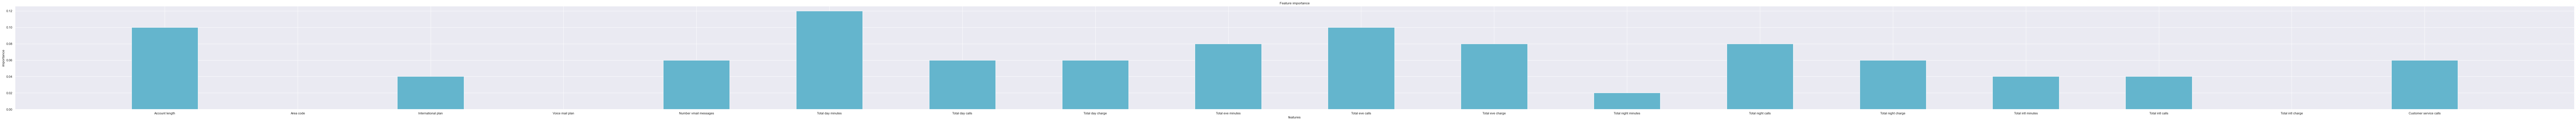

In [27]:
feature_names=np.array(train_x.columns)
feat_imp = skl_abc.feature_importances_

plt.figure(figsize=( 69*1.8, 6  ))

index = np.arange(len(feature_names))

plt.bar(index, feat_imp, color='c', width=0.5)
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Feature importance')
plt.xticks(index,feature_names)
plt.tight_layout()

plt.show()

Наиболее значимые признаки (указаны в порядке убывания значимости): Total day minutes, Account length, Total eve calls

### GradientBoostingClassifier

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
skl_gbc=GradientBoostingClassifier(random_state=348)
skl_gbc.fit(train_x,train_y)

GradientBoostingClassifier(random_state=348)

In [32]:
skl_gbc_predicted=skl_gbc.predict(test_x)
accuracy_gbc_test=skl_gbc.score(test_x,test_y)
accuracy_gbc_test

0.9511041009463722

In [33]:
skl_gbc_probabilities = skl_gbc.predict_proba(test_x )
roc_auc_gbc_test=roc_auc_score(test_y, skl_gbc_probabilities[:,1] )
roc_auc_gbc_test

0.947665594074434

In [34]:
precision_gbc_test=precision_score(test_y, skl_gbc_predicted)
precision_gbc_test

0.9054054054054054

In [35]:
recall_gbc_test=recall_score(test_y, skl_gbc_predicted)
recall_gbc_test

0.7362637362637363

0.947665594074434

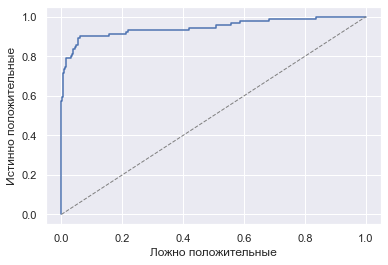

In [36]:
sns.set()
from sklearn import metrics
from sklearn.metrics import roc_curve

fpr,tpr,_=roc_curve(test_y, skl_gbc_probabilities[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color='grey', lw=1,linestyle='--')
plt.xlabel('Ложно положительные')
plt.ylabel('Истинно положительные')
metrics.auc(fpr,tpr)

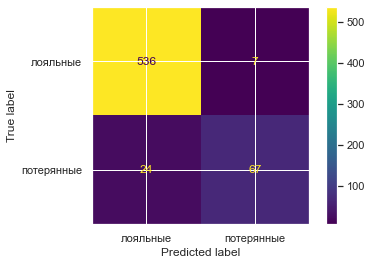

In [37]:
cm=confusion_matrix(test_y, skl_gbc_predicted) # матрица неточностей
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['лояльные', 'потерянные'])
disp.plot()

In [39]:
skl_gbc_unseen=data_unseen.copy(deep=True)
skl_gbc_result=skl_gbc.predict(data_unseen_)
skl_gbc_unseen.insert(loc=18,column='Predicted', value=skl_gbc_result)
#skl_gbc_unseen.sort_values(by='Churn',ascending=False).head(22)
res_gbc=skl_gbc_unseen.where(((skl_gbc_unseen['Churn']==1)&(skl_gbc_unseen['Predicted']==1))|((skl_gbc_unseen['Churn']==0)&(skl_gbc_unseen['Predicted']==0))) #датасет с данными где предсказали прекращение контракта и это на самом деле случилось
res_gbc=res_gbc.dropna() 
res_gbc.head(167) 

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Predicted,Churn
0,118.0,510.0,1.0,0.0,0.0,223.4,98.0,37.98,220.6,101.0,18.75,203.9,118.0,9.18,6.3,6.0,1.70,0.0,0.0,0.0
1,95.0,510.0,0.0,0.0,0.0,156.6,88.0,26.62,247.6,75.0,21.05,192.3,115.0,8.65,12.3,5.0,3.32,3.0,0.0,0.0
2,93.0,510.0,0.0,0.0,0.0,190.7,114.0,32.42,218.2,111.0,18.55,129.6,121.0,5.83,8.1,3.0,2.19,3.0,0.0,0.0
4,70.0,415.0,0.0,1.0,24.0,249.5,101.0,42.42,259.7,98.0,22.07,222.7,68.0,10.02,9.8,4.0,2.65,1.0,0.0,0.0
5,94.0,408.0,0.0,0.0,0.0,157.9,105.0,26.84,155.0,101.0,13.18,189.6,84.0,8.53,8.0,5.0,2.16,4.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,115.0,415.0,0.0,0.0,0.0,226.4,101.0,38.49,276.8,60.0,23.53,213.4,82.0,9.60,12.3,4.0,3.32,3.0,1.0,1.0
163,134.0,415.0,0.0,0.0,0.0,164.9,115.0,28.03,126.5,96.0,10.75,238.5,125.0,10.73,10.0,9.0,2.70,2.0,0.0,0.0
164,76.0,408.0,0.0,0.0,0.0,107.3,140.0,18.24,238.2,133.0,20.25,271.8,116.0,12.23,10.0,3.0,2.70,4.0,1.0,1.0
165,114.0,415.0,0.0,1.0,26.0,137.1,88.0,23.31,155.7,125.0,13.23,247.6,94.0,11.14,11.5,7.0,3.11,2.0,0.0,0.0


При применении модели GradientBoosting из библиотеки Scikit-learn к новым данным 154 случаев из 167 были предсказаны верно

In [41]:
count_case_max=skl_gbc_unseen.shape[0]
count_case_true=res_gbc.shape[0]
count_str_gbc=str(count_case_true)+' из '+str(count_case_max)
count_str_gbc

'154 из 167'

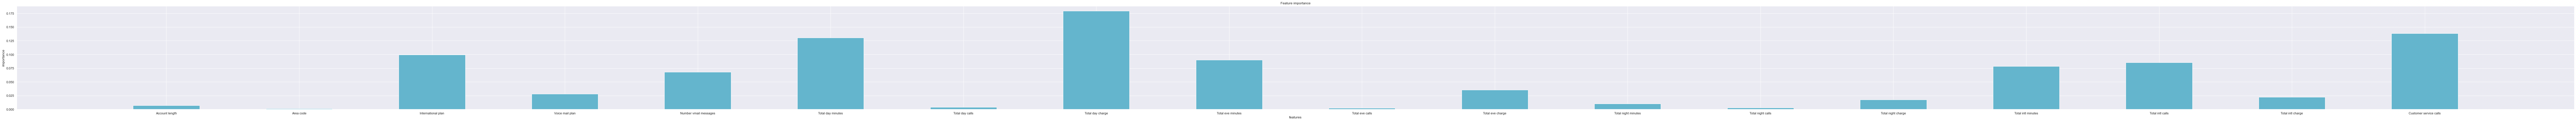

In [40]:
feat_imp = skl_gbc.feature_importances_

plt.figure(figsize=( 69*1.8, 6  ))

index = np.arange(len(feature_names))

plt.bar(index, feat_imp, color='c', width=0.5)
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Feature importance')
plt.xticks(index,feature_names)
plt.tight_layout()

plt.show()

Наиболее значимые признаки (указаны в порядке убывания значимости): Total day charge, Customer service calls, Total day minutes

In [45]:
df_marks=pd.read_csv('8. m2_results_p1.csv')
df_marks.head()

,Metod Name,Accuracy_test,Precision_test,Recall_test,Roc_auc_test,Правильно предсказали в итоговом тесте
0,Scikit-learn Random Forest,0.951104,0.905405,0.736264,0.942181,156 из 167


In [46]:
new_row1 = {'Metod Name':'Scikit-learn AdaBoostClassifier', 'Accuracy_test':accuracy_abc_test, 'Precision_test':precision_abc_test, 'Recall_test':recall_abc_test, 'Roc_auc_test':roc_auc_abc_test, 'Правильно предсказали в итоговом тесте':count_str_abc}
new_row2 = {'Metod Name':'Scikit-learn GradientBoostingClassifier', 'Accuracy_test':accuracy_gbc_test, 'Precision_test':precision_gbc_test, 'Recall_test':recall_gbc_test, 'Roc_auc_test':roc_auc_gbc_test, 'Правильно предсказали в итоговом тесте':count_str_gbc}
df_marks = pd.concat([df_marks, pd.DataFrame.from_records([new_row1]),pd.DataFrame.from_records([new_row2])])
df_marks.to_csv('8. m2_results_p1.csv', index=False)

In [47]:
temp=pd.read_csv('8. m2_results_p1.csv')
temp.head()

,Metod Name,Accuracy_test,Precision_test,Recall_test,Roc_auc_test,Правильно предсказали в итоговом тесте
0,Scikit-learn Random Forest,0.951104,0.905405,0.736264,0.942181,156 из 167
1,Scikit-learn AdaBoostClassifier,0.884858,0.655172,0.417582,0.888673,145 из 167
2,Scikit-learn GradientBoostingClassifier,0.951104,0.905405,0.736264,0.947666,154 из 167


Среднее значение Accuracy - аккуратность: процент (коэффициент) случаев, классифицированных правильно <br>
Точность модели (Precision) - доля правильных ответов модели во всех предсказанных как положительные<br>
Полнота (Recall) - показывает какую долю объектов, реально относящихся к положительному классу, мы предсказали верно<br>

При применении модели RandomForest из библиотеки Scikit-learn к новым данным 156 случаев из 167 были предсказаны верно<br>
При применении модели AdaBoost из библиотеки Scikit-learn к новым данным 145 случаев из 167 были предсказаны верно<br>
При применении модели GradientBoosting из библиотеки Scikit-learn к новым данным 154 случаев из 167 были предсказаны верно<br>
<br>
При применении модели XGBoost к новым данным 15 случаев из 22 были предсказаны верно<br>
<br>
При обучении моделей с помощью бибилиотеки AutoGluon из 22 отказов правильно были предсказаны:<br>
16 в модели XGBoost<br>
15 в модели LightGBM<br>
14 в модели WeightedEnsemble_L2<br>
14 в модели CatBoost<br>
<br>
При обучении моделей с помощью бибилиотеки PyCaret из 22 отказов правильно были предсказаны:<br>
15 в модели Random Forest<br>
14 в модели XGBoost<br>
13 в модели CatBoost<br>
10 в модели LightGBM

Модели очень чувствительны к данным и при изменении выборки данных получается другое количество правильно предсказанных случаев и оказываются важными другие признаки